# Important Distributions
This notebook shows some of the most important distributions, which are also introduced during the lecture. It further shows how random variates are generated. And, it shows some basic concepts of statistical tests.

In [1]:
# Some important modules, which are used througout the notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import seaborn as sns

In [2]:
# Turn off warnings about deprectaed functions (we wont change the setup anyway)
import warnings
warnings.filterwarnings('ignore')

## Gaussian distribution

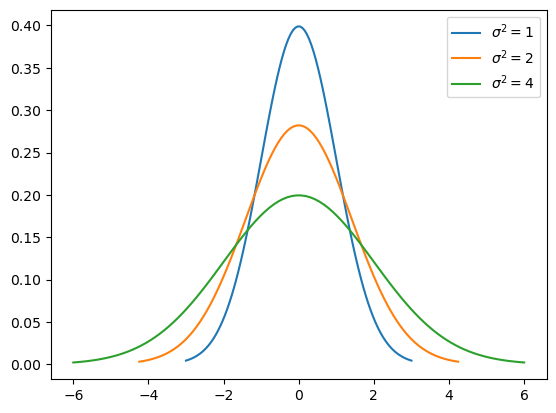

In [3]:
def plot_gaussian(mu, variance):
    sigma = math.sqrt(variance)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), label='$\sigma^2='+str(variance)+'$')

plot_gaussian(0, 1)
plot_gaussian(0, 2)
plot_gaussian(0, 4)
plt.legend(loc='upper right')
# plt.savefig("Chapter2_Gaussian-Distribution.png")
plt.show()

## 2D Gaussian Distribution

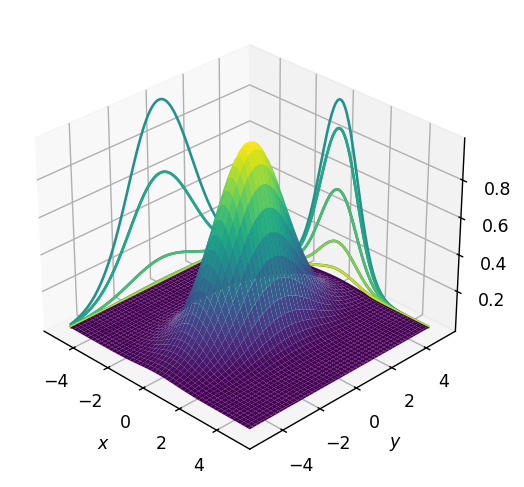

In [4]:
# Load modules first
import numpy as np
import matplotlib.pyplot as plt

# Main parameters of the d
mu0 = 0; # expected value along x
mu1 = 0; # expected value along y
s0 = 1; # standard deviation along x
s1 = 3; # standard deviation along y

fig = plt.figure(dpi = 125); # create a new figure
ax = plt.axes(projection='3d'); # 3D Plot
ax.set_xlabel("$x$");
ax.set_ylabel("$y$");
ax.set_zlabel("$z$");

num_intervals = 100; # stepsize for mesh that is plotted
X, Y = np.meshgrid(np.linspace(-5, 5, num_intervals), np.linspace(-5, 5, num_intervals));
Z = np.exp(-((X - mu0)*(X - mu0)/(2*s0) + (Y - mu1)*(Y - mu1)/(2*s1))); # 2D Gaussian distribution

# Plot the surface
ax.plot_surface(X, Y, Z,
                rstride=2 , cstride=2,
                cmap='viridis', edgecolor = 'none')

# Add contour lines on X and Y plane
ax.contour(X, Y, Z, 10, zdir='x', offset=-5, linestyles="solid")
ax.contour(X, Y, Z, 10, zdir='y', offset=5, linestyles="solid")

# initial view on the function
ax.view_init(30, -45);

# Save the figure
# plt.savefig("2D-Gaussian-Distribution.png");

### Example for normal distribution - distribution of avarage temperature and rainfall

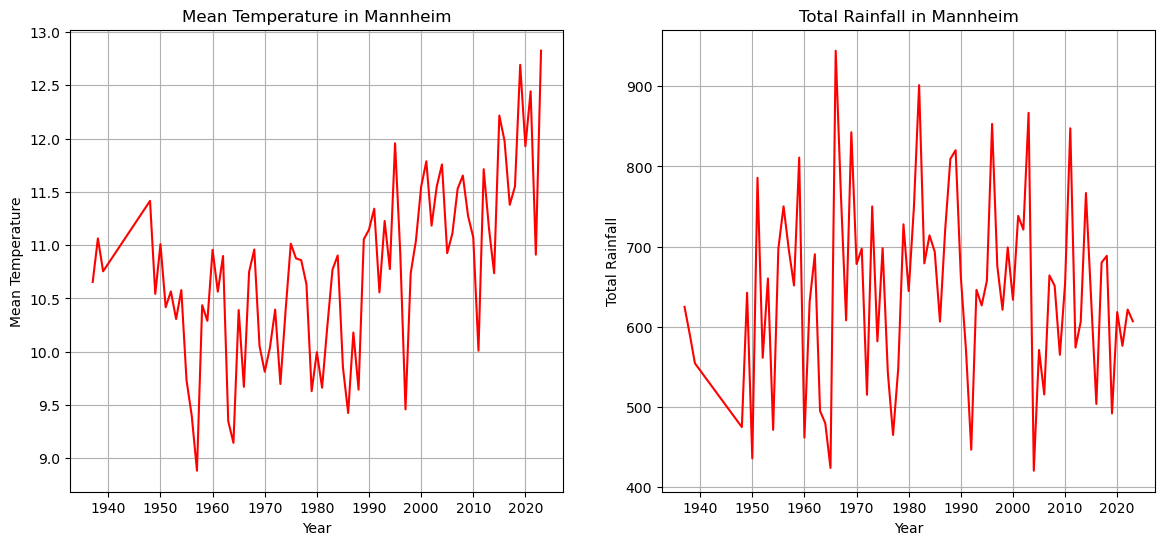

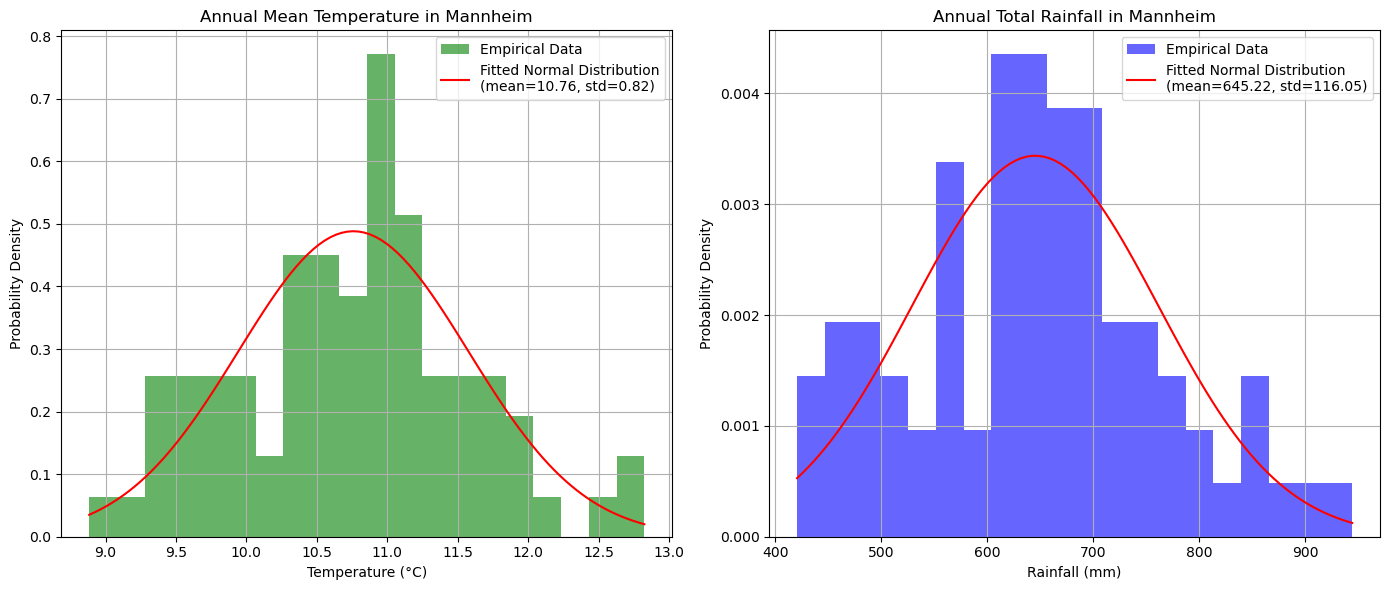

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde

# Load the data
# https://www.dwd.de/DE/leistungen/klimadatendeutschland/klimadatendeutschland.html
# In this particular case for Mannheim
data = pd.read_csv("produkt_klima_tag_19360101_20221231_05906.csv", sep=';')

# Display the first few rows of the dataset
data.head()
data.dropna(inplace = True)

# Process the data
data['MESS_DATUM'] = pd.to_datetime(data['MESS_DATUM'], format='%Y%m%d')
data.set_index('MESS_DATUM', inplace=True)
data.drop(data[data.RSK < 0].index, inplace=True)

# Calculate annual mean temperature and total rainfall
annual_data = data.resample('Y').agg({'TMK': 'mean', 'RSK': 'sum'})
annual_data.dropna(inplace = True)

# Extract values
mean_temperatures = annual_data['TMK'] # Temperature

# Plot over the years
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(mean_temperatures, 'r-')
plt.title('Mean Temperature in Mannheim')
plt.xlabel('Year')
plt.ylabel('Mean Temperature')
plt.grid(True)

total_rainfall = annual_data['RSK'] # Rainfall
plt.subplot(1, 2, 2)
plt.plot(total_rainfall, 'r-')
plt.title('Total Rainfall in Mannheim')
plt.xlabel('Year')
plt.ylabel('Total Rainfall')
plt.grid(True)

# Fit normal distributions
mu_temp, sigma_temp = norm.fit(mean_temperatures)
mu_rain, sigma_rain = norm.fit(total_rainfall)

# Generate fitted values
x_temp = np.linspace(min(mean_temperatures), max(mean_temperatures), 100)
x_rain = np.linspace(min(total_rainfall), max(total_rainfall), 100)
pdf_temp = norm.pdf(x_temp, mu_temp, sigma_temp)
pdf_rain = norm.pdf(x_rain, mu_rain, sigma_rain)

# Plot the histograms and fitted PDFs
plt.figure(figsize=(14, 6))

# Temperature Plot
plt.subplot(1, 2, 1)
plt.hist(mean_temperatures, bins=20, density=True, alpha=0.6, color='g', label='Empirical Data')
plt.plot(x_temp, pdf_temp, 'r-', label=f'Fitted Normal Distribution\n(mean={mu_temp:.2f}, std={sigma_temp:.2f})')
plt.title('Annual Mean Temperature in Mannheim')
plt.xlabel('Temperature (°C)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

# Rainfall Plot
plt.subplot(1, 2, 2)
plt.hist(total_rainfall, bins=20, density=True, alpha=0.6, color='b', label='Empirical Data')
plt.plot(x_rain, pdf_rain, 'r-', label=f'Fitted Normal Distribution\n(mean={mu_rain:.2f}, std={sigma_rain:.2f})')
plt.title('Annual Total Rainfall in Mannheim')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Example for normal distribution - sum of independent r.v. 

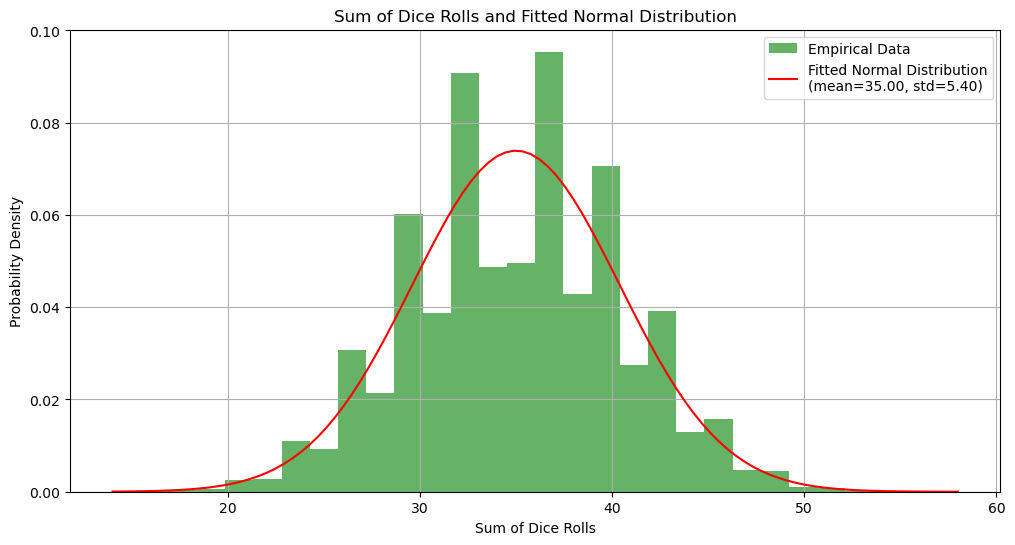

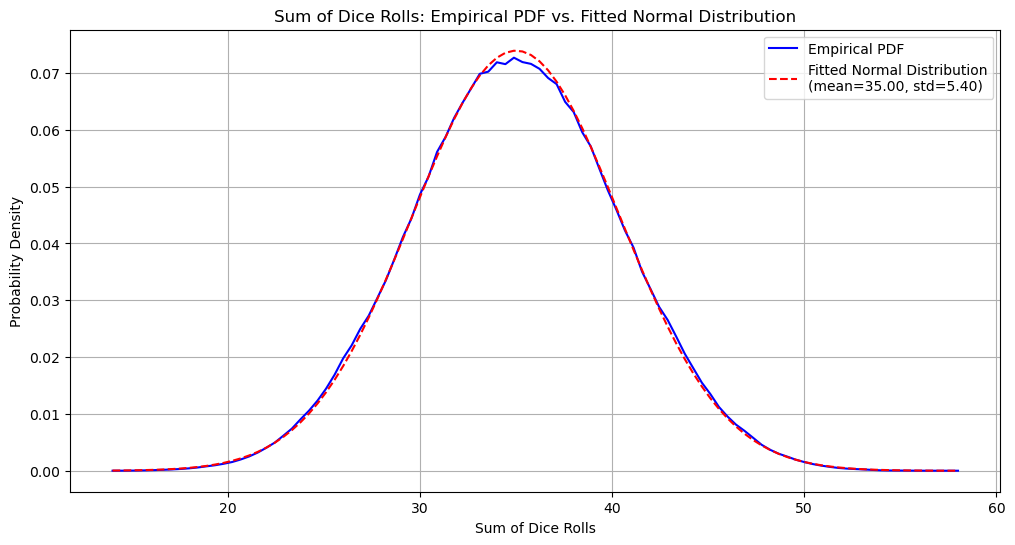

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Function to simulate rolling dice
def roll_dice(num_rolls, num_dice):
    return np.sum(np.random.randint(1, 7, (num_rolls, num_dice)), axis=1)

# Parameters
num_rolls = 100000  # Number of times the dice are rolled
num_dice = 10 # Number of dice rolled each time

# Simulate rolling dice
dice_sums = roll_dice(num_rolls, num_dice)

# Fit a normal distribution to the summed dice rolls
mu, sigma = norm.fit(dice_sums)

# Generate values for the fitted normal distribution
x = np.linspace(min(dice_sums), max(dice_sums), 100)
pdf_fitted = norm.pdf(x, mu, sigma)

# Plot the histogram of the summed dice rolls and the fitted normal distribution
plt.figure(figsize=(12, 6))
plt.hist(dice_sums, bins=30, density=True, alpha=0.6, color='g', label='Empirical Data')
plt.plot(x, pdf_fitted, 'r-', label=f'Fitted Normal Distribution\n(mean={mu:.2f}, std={sigma:.2f})')
plt.title('Sum of Dice Rolls and Fitted Normal Distribution')
plt.xlabel('Sum of Dice Rolls')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

# Overlay empirical PDF
# Calculate empirical PDF using Kernel Density Estimation (KDE)
from scipy.stats import gaussian_kde
kde = gaussian_kde(dice_sums)
pdf_empirical = kde(x)

# Plot the empirical PDF and the fitted normal distribution
plt.figure(figsize=(12, 6))
plt.plot(x, pdf_empirical, 'b-', label='Empirical PDF')
plt.plot(x, pdf_fitted, 'r--', label=f'Fitted Normal Distribution\n(mean={mu:.2f}, std={sigma:.2f})')
plt.title('Sum of Dice Rolls: Empirical PDF vs. Fitted Normal Distribution')
plt.xlabel('Sum of Dice Rolls')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


### Fast fading channel

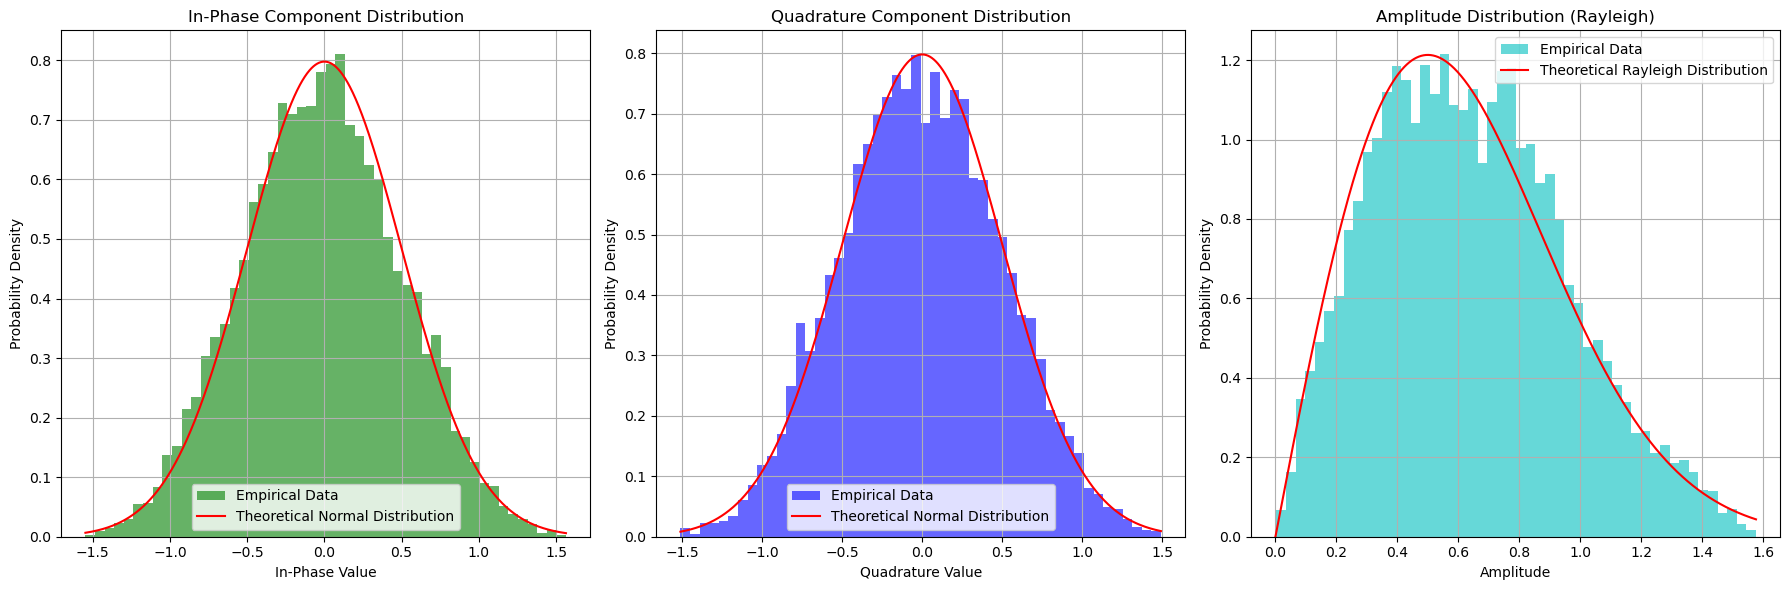

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, rayleigh

# Parameters
num_samples = 10000  # Number of samples
num_paths = 5      # Number of multipath components

# Simulate the fast fading process
def simulate_rayleigh_fading(num_samples, num_paths):
    # Random phases uniformly distributed between 0 and 2*pi
    phases = np.random.uniform(0, 2 * np.pi, (num_samples, num_paths))
    
    # In-phase and quadrature components
    in_phase = np.sum(np.cos(phases), axis=1)
    quadrature = np.sum(np.sin(phases), axis=1)
    
    # Normalize the in-phase and quadrature components
    in_phase /= np.sqrt(2*num_paths)
    quadrature /= np.sqrt(2*num_paths)
    
    # Compute the amplitude
    amplitude = np.sqrt(in_phase**2 + quadrature**2)
    
    return in_phase, quadrature, amplitude

# Simulate Rayleigh fading
in_phase, quadrature, amplitude = simulate_rayleigh_fading(num_samples, num_paths)

# Plot histogram of the in-phase and quadrature components
plt.figure(figsize=(18, 6))

# Plot 1: In-phase component
plt.subplot(1, 3, 1)
plt.hist(in_phase, bins=50, density=True, alpha=0.6, color='g', label='Empirical Data')
x = np.linspace(min(in_phase), max(in_phase), 1000)
pdf_in_phase = norm.pdf(x, 0, 0.5)
plt.plot(x, pdf_in_phase, 'r-', label='Theoretical Normal Distribution')
plt.title('In-Phase Component Distribution')
plt.xlabel('In-Phase Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

# Plot 2: Quadrature component
plt.subplot(1, 3, 2)
plt.hist(quadrature, bins=50, density=True, alpha=0.6, color='b', label='Empirical Data')
x = np.linspace(min(quadrature), max(quadrature), 1000)
pdf_quadrature = norm.pdf(x, 0, 0.5)
plt.plot(x, pdf_quadrature, 'r-', label='Theoretical Normal Distribution')
plt.title('Quadrature Component Distribution')
plt.xlabel('Quadrature Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

# Plot 3: Amplitude (Rayleigh distribution)
plt.subplot(1, 3, 3)
plt.hist(amplitude, bins=50, density=True, alpha=0.6, color='c', label='Empirical Data')
x = np.linspace(0, np.max(amplitude), 1000)
pdf_rayleigh = rayleigh.pdf(x, scale=0.5)
plt.plot(x, pdf_rayleigh, 'r-', label='Theoretical Rayleigh Distribution')
plt.title('Amplitude Distribution (Rayleigh)')
plt.xlabel('Amplitude')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Log-normal distribution

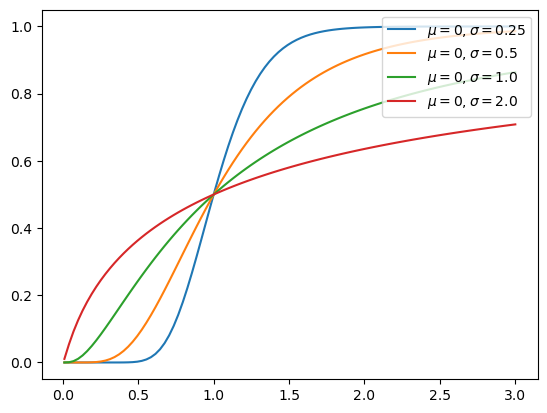

In [60]:
import math
from scipy import stats

def plot_log_normal(mu, variance):
    sigma = math.sqrt(variance)
    x = np.linspace(0.01, 3.0, 100)
    plt.plot(x, stats.lognorm.cdf(x, sigma, mu), label='$\mu=' + str(mu) + ', \sigma='+str(sigma)+'$')    
    
plot_log_normal(0, 0.25*0.25)
plot_log_normal(0, 0.5*0.5)
plot_log_normal(0, 1)
plot_log_normal(0, 4)
plt.legend(loc='upper right')
# plt.savefig("Chapter2_Lognormal-Distribution.png")
plt.show()

## Gamma distribution

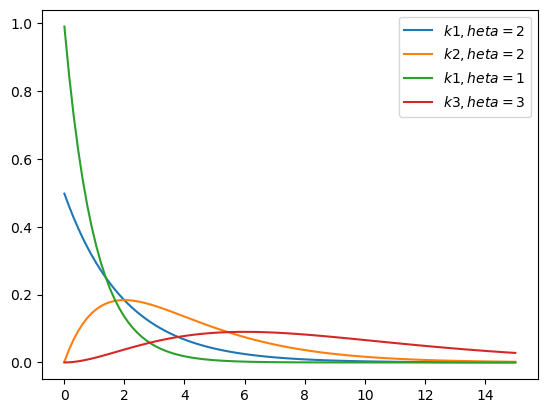

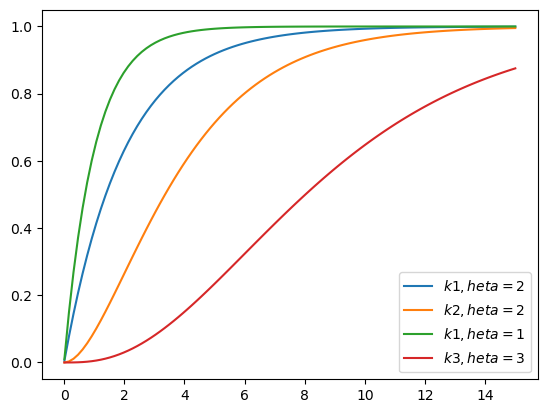

In [8]:
def plot_gamma_pdf(k, theta):
    x = np.linspace(0.01, 15.0, 100)    
    plt.plot(x, stats.gamma.pdf(x, k, scale = theta), label='$k' + str(k) + ', \theta='+str(theta)+'$')    

def plot_gamma_cdf(k, theta):
    x = np.linspace(0.01, 15.0, 100)    
    plt.plot(x, stats.gamma.cdf(x, k, scale = theta), label='$k' + str(k) + ', \theta='+str(theta)+'$')    
    
plot_gamma_pdf(1, 2)
plot_gamma_pdf(2, 2)
plot_gamma_pdf(1, 1)
plot_gamma_pdf(3, 3)
plt.legend(loc='upper right')
# plt.savefig("Chapter2_Gamma-Distribution.png")
plt.show()

plot_gamma_cdf(1, 2)
plot_gamma_cdf(2, 2)
plot_gamma_cdf(1, 1)
plot_gamma_cdf(3, 3)
plt.legend(loc='lower right')
# plt.savefig("Chapter2_Gamma-Distribution_CDF.png")
plt.show()

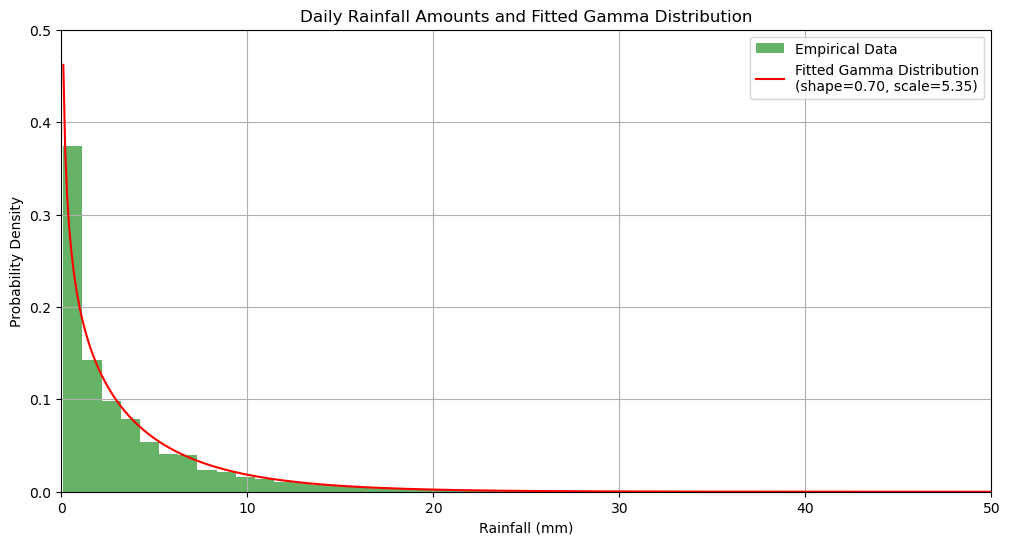

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Load the data
# https://www.dwd.de/DE/leistungen/klimadatendeutschland/klimadatendeutschland.html
# In this particular case for Mannheim
data = pd.read_csv("produkt_klima_tag_19360101_20221231_05906.csv", sep=';')

# Display the first few rows of the dataset
data.head()
data.dropna(inplace = True)

# Process the data
data['MESS_DATUM'] = pd.to_datetime(data['MESS_DATUM'], format='%Y%m%d')
data.set_index('MESS_DATUM', inplace=True)
data.drop(data[data.RSK < 0.1].index, inplace=True)

# Fit a Gamma distribution to the daily rainfall amounts
shape, loc, scale = gamma.fit(data['RSK'], floc=0)

# Generate values for the fitted Gamma distribution
x = np.linspace(0, max(data['RSK']), 1000)
pdf_fitted = gamma.pdf(x, shape, loc=loc, scale=scale)

# Plot the histogram of the daily rainfall amounts and the fitted Gamma distribution
plt.figure(figsize=(12, 6))
plt.hist(data['RSK'], bins=100, density=True, alpha=0.6, color='g', label='Empirical Data')
plt.plot(x, pdf_fitted, 'r-', label=f'Fitted Gamma Distribution\n(shape={shape:.2f}, scale={scale:.2f})')
plt.title('Daily Rainfall Amounts and Fitted Gamma Distribution')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Probability Density')
plt.axis([0, 50, 0, 0.5])
plt.legend()
plt.grid(True)
plt.savefig("Chapter4_Gamma-Distribution_Rainfall.png")
plt.show()


### Example for number of stars; does not fit exactly as the mapping of a 3D Poisson was ignored ...

   star_count  ra_bin  dec_bin
0         110   164.0    -55.0
1          23   164.0     55.0
2          49   192.0    -65.0
3           6   192.0     65.0
4          26     0.0      0.0


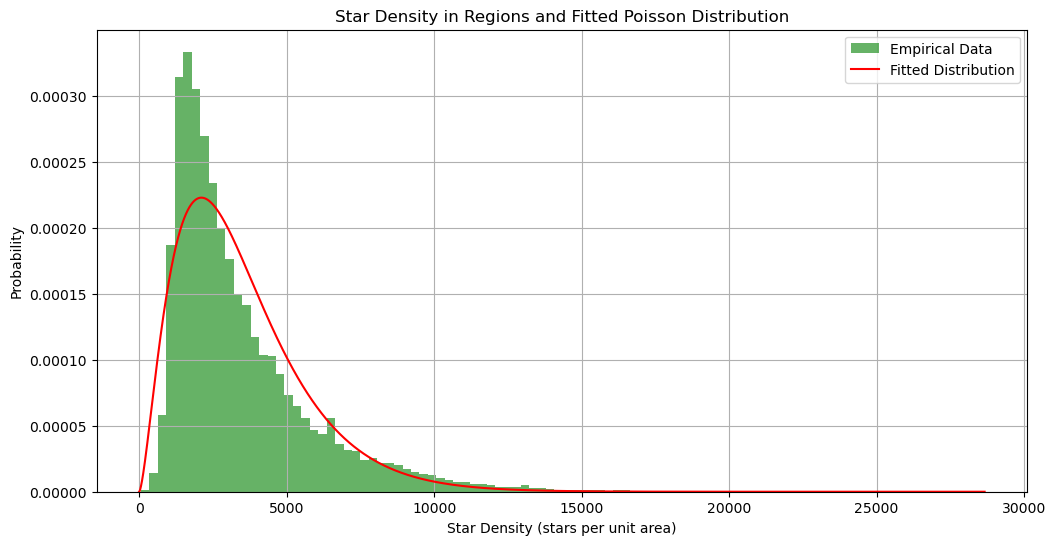

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, chisquare

# Example: Load the dataset (replace with the actual path to the dataset)
data_path = "star_counts.csv"  # Change to your actual file path
data = pd.read_csv(data_path)

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Calculate the area for each bin
data_area = np.abs(np.sin(np.radians(data['dec_bin'])) - np.sin(np.radians(data['dec_bin']+1.0)))

# Calculate the star density
data['star_density'] = data['star_count'] / data_area

# Fit a Gamma distribution to the daily rainfall amounts
shape, loc, scale = gamma.fit(data['star_density'], floc=0)

# Generate values for the fitted Gamma distribution
x = np.arange(0, max(data['star_density']) + 1)
pdf_fitted = gamma.pdf(x, shape, loc=loc, scale=scale)


# Plot the histogram of the star densities and the fitted Poisson distribution
plt.figure(figsize=(12, 6))
plt.hist(data['star_density'], bins=100, density=True, alpha=0.6, color='g', label='Empirical Data')
plt.plot(x, pdf_fitted, 'r-', label=f'Fitted Distribution')
plt.title('Star Density in Regions and Fitted Poisson Distribution')
plt.xlabel('Star Density (stars per unit area)')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()



## Exponential distribution

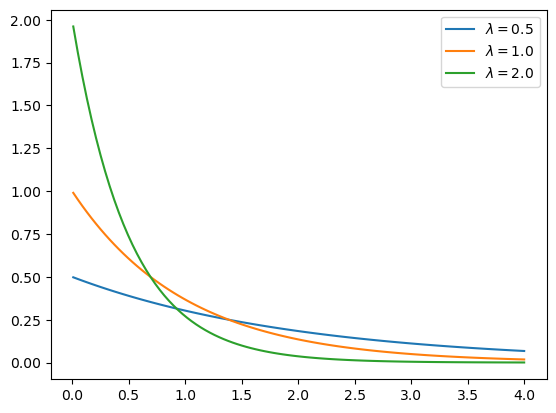

In [9]:
def plot_exponential(l):    
    x = np.linspace(0.01, 4.0, 100)
    plt.plot(x, stats.expon.pdf(x, scale = 1/l), label='$\lambda=' + str(l) + '$')    
    
plot_exponential(0.5)
plot_exponential(1.0)
plot_exponential(2.0)
plt.legend(loc='upper right')
# plt.savefig("Chapter2_Exponential-Distribution.png")
plt.show()

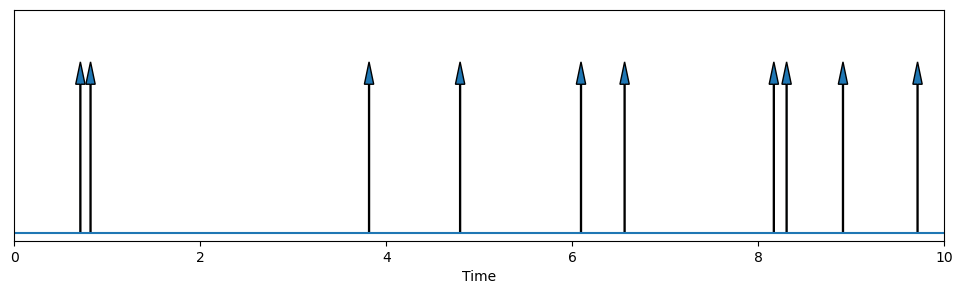

In [11]:
# This figure shows an example for a Poisson process where the inter-arrival time of events is exponentially distributed
fig, ax = plt.subplots(figsize=(12, 3))
ax.set_yticks([])
# ax.set_xticks([])
ax.set_xlim(0, 10)
ax.set_xlabel("Time")
ax.set_ylim(-0.05, 1.5)
ax.axhline(0);
x = 0;
while x < 10:
    dx = stats.expon.rvs(size = 1);        
    x = x + dx[0];
    ax.arrow(x, 0, 0, 1, width=0.01, head_width=0.1);
# fig.savefig("Chapter2_Exponential-Distribution-Arrival-Process.png")    

### Example for an exponential distribution using the timing of earthquakes

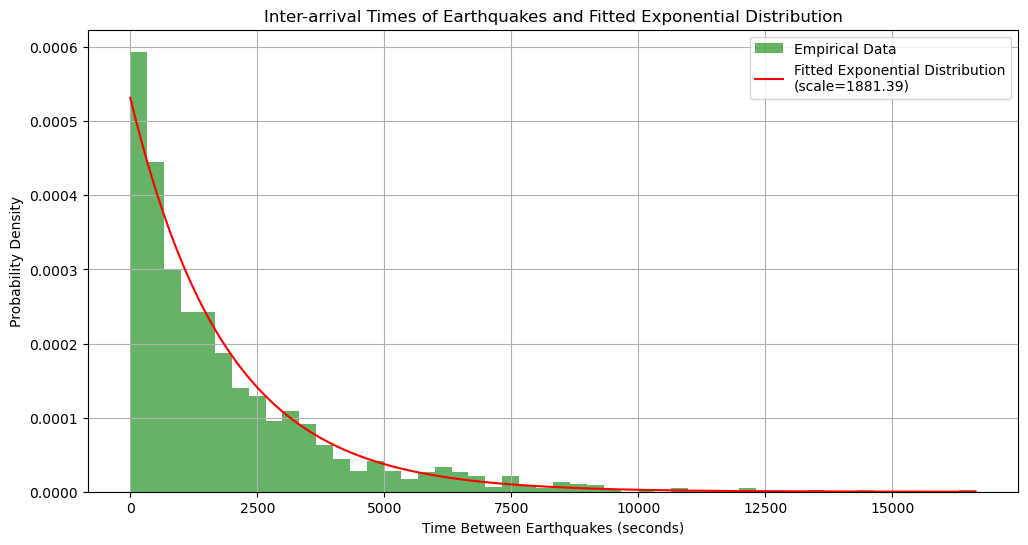

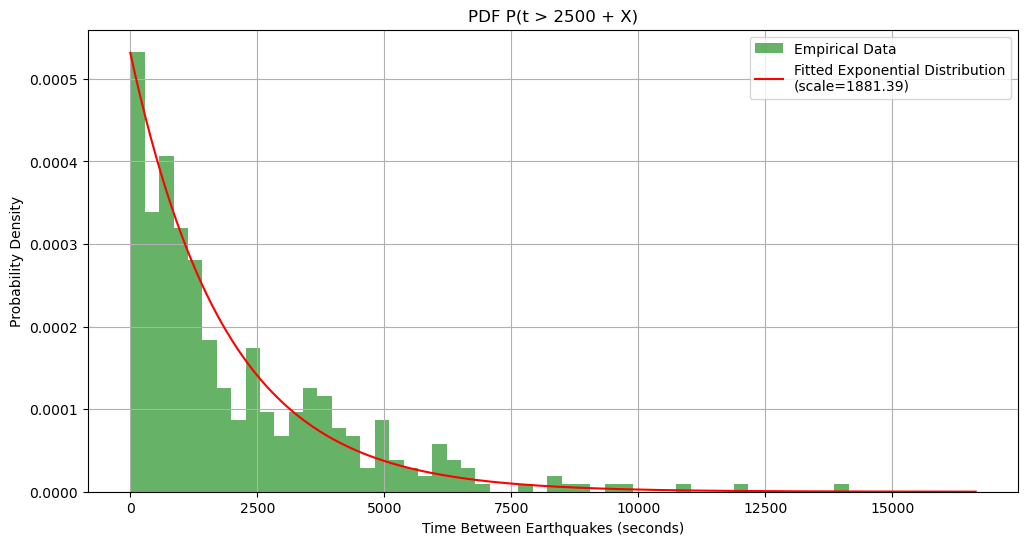

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Download and load the dataset
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_month.csv"
data_path = "2.5_month.csv"
data = pd.read_csv(data_path)

# Display the first few rows of the dataset to understand its structure
data.head()
data.dropna(inplace = True)

# Process the data to extract the time between successive earthquakes
data['time'] = pd.to_datetime(data['time'])
data = data.sort_values(by='time')
data['time_diff'] = data['time'].diff().dt.total_seconds().dropna()

# Fit an exponential distribution to the inter-arrival times
time_diffs = data['time_diff']
time_diffs.dropna(inplace = True)
lambda_param = 1 / np.mean(time_diffs)
loc, scale = expon.fit(time_diffs, floc=0)

# Generate values for the fitted exponential distribution
x = np.linspace(0, max(time_diffs), 1000)
pdf_fitted = expon.pdf(x, loc, scale)

# Plot the histogram of the inter-arrival times and the fitted exponential distribution
plt.figure(figsize=(12, 6))
plt.hist(time_diffs, bins=50, density=True, alpha=0.6, color='g', label='Empirical Data')
plt.plot(x, pdf_fitted, 'r-', label=f'Fitted Exponential Distribution\n(scale={scale:.2f})')
plt.title('Inter-arrival Times of Earthquakes and Fitted Exponential Distribution')
plt.xlabel('Time Between Earthquakes (seconds)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.savefig("Chapter4_Exponential-Distribution-Earthquake_1.png")
plt.show()

# Illustrate the memoryless property
time_diffs.drop(time_diffs[time_diffs < 2500].index, inplace=True)
time_diffs = time_diffs - 2500
plt.figure(figsize=(12, 6))
plt.hist(time_diffs, bins=50, density=True, alpha=0.6, color='g', label='Empirical Data')
plt.plot(x, pdf_fitted, 'r-', label=f'Fitted Exponential Distribution\n(scale={scale:.2f})')
plt.title('PDF P(t > 2500 + X)')
plt.xlabel('Time Between Earthquakes (seconds)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.savefig("Chapter4_Exponential-Distribution-Earthquake_2.png")
plt.show()


## Poisson distribution

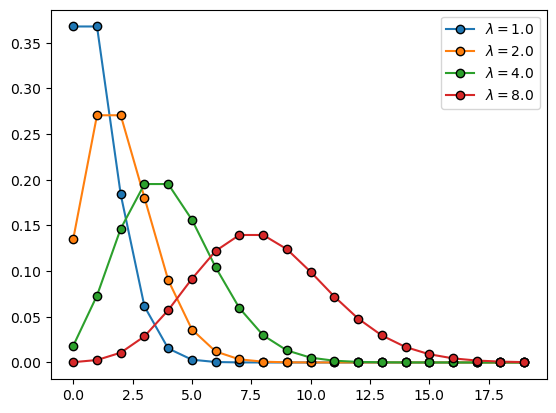

In [12]:
def plot_poisson(l):        
    x = np.arange(0, 20, 1, dtype=int)    
    plt.plot(x, stats.poisson.pmf(x, l), marker = 'o', markeredgecolor = 'black', label='$\lambda=' + str(l) + '$')    
    
plot_poisson(1.0)
plot_poisson(2.0)
plot_poisson(4.0)
plot_poisson(8.0)
plt.legend(loc='upper right')
# plt.savefig("Chapter2_Poisson-Distribution.png")
plt.show()

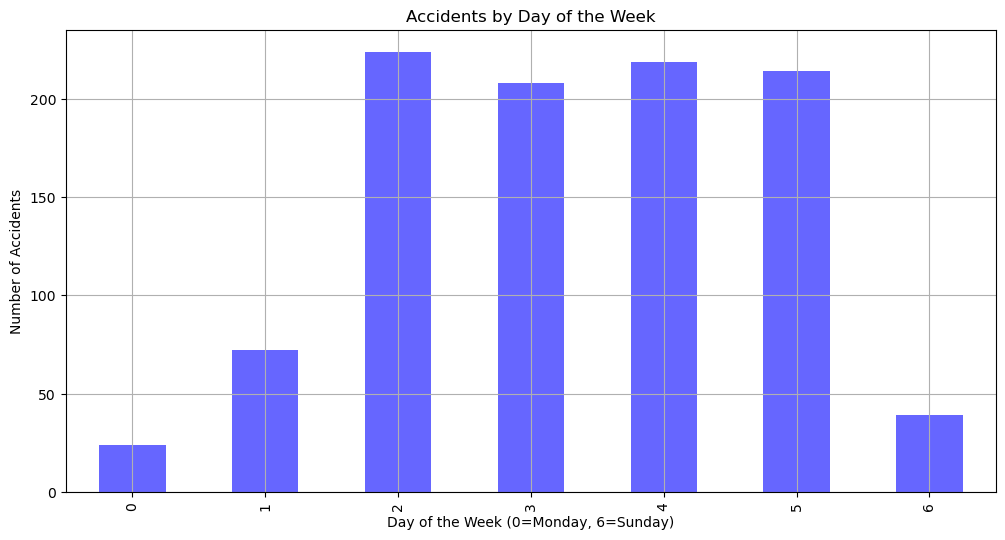

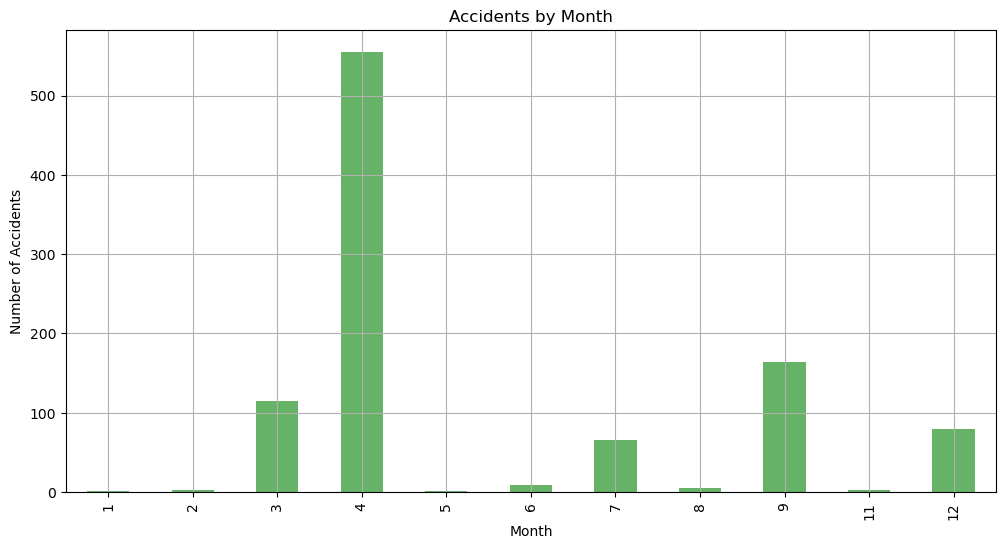

Mean number of accidents per day: 10.869565217391305
Variance of accidents per day: 891.265595463137
Variance-to-mean ratio: 81.9964347826086


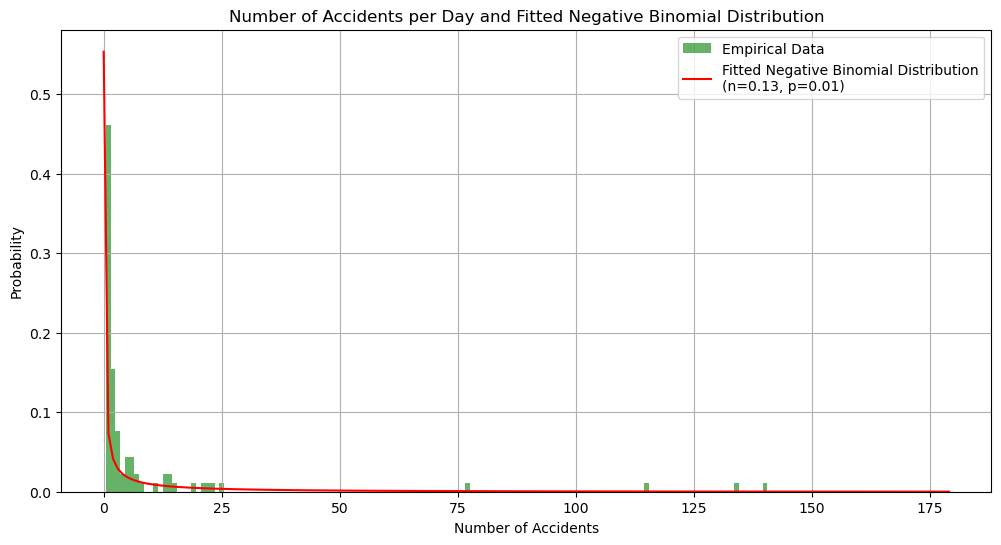

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, chisquare, nbinom

# Load the dataset (replace with the actual path to the dataset)
data_url = "https://data.cityofnewyork.us/resource/h9gi-nx95.csv"
data = pd.read_csv(data_url, parse_dates=['crash_date'])

# Aggregate the number of accidents per day
data['crash_date'] = pd.to_datetime(data['crash_date'])
accidents_per_day = data.groupby(data['crash_date'].dt.date).size()

# Check for patterns based on day of the week
data['day_of_week'] = data['crash_date'].dt.dayofweek
accidents_by_day_of_week = data.groupby('day_of_week').size()

plt.figure(figsize=(12, 6))
accidents_by_day_of_week.plot(kind='bar', color='blue', alpha=0.6)
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

# Check for patterns based on month
data['month'] = data['crash_date'].dt.month
accidents_by_month = data.groupby('month').size()

plt.figure(figsize=(12, 6))
accidents_by_month.plot(kind='bar', color='green', alpha=0.6)
plt.title('Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

# Check for overdispersion
mean_accidents = np.mean(accidents_per_day)
variance_accidents = np.var(accidents_per_day)
variance_to_mean_ratio = variance_accidents / mean_accidents

print(f"Mean number of accidents per day: {mean_accidents}")
print(f"Variance of accidents per day: {variance_accidents}")
print(f"Variance-to-mean ratio: {variance_to_mean_ratio}")

# Fit a negative binomial distribution if overdispersion is detected
if variance_to_mean_ratio > 1:
    # Calculate parameters for negative binomial distribution
    p = mean_accidents / variance_accidents
    n = mean_accidents * p / (1 - p)
    
    # Fit negative binomial distribution
    nbinom_fit = nbinom(n=n, p=p)
    
    # Generate values for the fitted negative binomial distribution
    x = np.arange(0, max(accidents_per_day) + 1)
    pmf_nbinom_fitted = nbinom_fit.pmf(x)
    
    # Plot the histogram of the accident counts and the fitted negative binomial distribution
    plt.figure(figsize=(12, 6))
    plt.hist(accidents_per_day, bins=np.arange(min(accidents_per_day), max(accidents_per_day) + 1) - 0.5, density=True, alpha=0.6, color='g', label='Empirical Data')
    plt.plot(x, pmf_nbinom_fitted, 'r-', label=f'Fitted Negative Binomial Distribution\n(n={n:.2f}, p={p:.2f})')
    plt.title('Number of Accidents per Day and Fitted Negative Binomial Distribution')
    plt.xlabel('Number of Accidents')
    plt.ylabel('Probability')
    plt.legend()
    plt.grid(True)
    plt.show()


## Binomial distribution

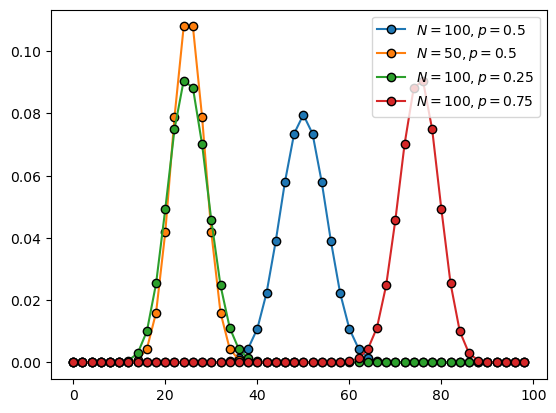

In [13]:
def plot_binomial(N, p):        
    x = np.arange(0, N, 2, dtype=int)    
    plt.plot(x, stats.binom.pmf(x, N, p), marker = 'o', markeredgecolor = 'black', label='$N=' + str(N) + ', p = ' + str(p) + '$')    
        
plot_binomial(100, 0.5)
plot_binomial(50, 0.5)
plot_binomial(100, 0.25)
plot_binomial(100, 0.75)
plt.legend(loc='upper right')
# plt.savefig("Chapter2_Binomial-Distribution.png")
plt.show()

# Random Variates
This part shows how random variates are generated.

## Linear Congruential Generator

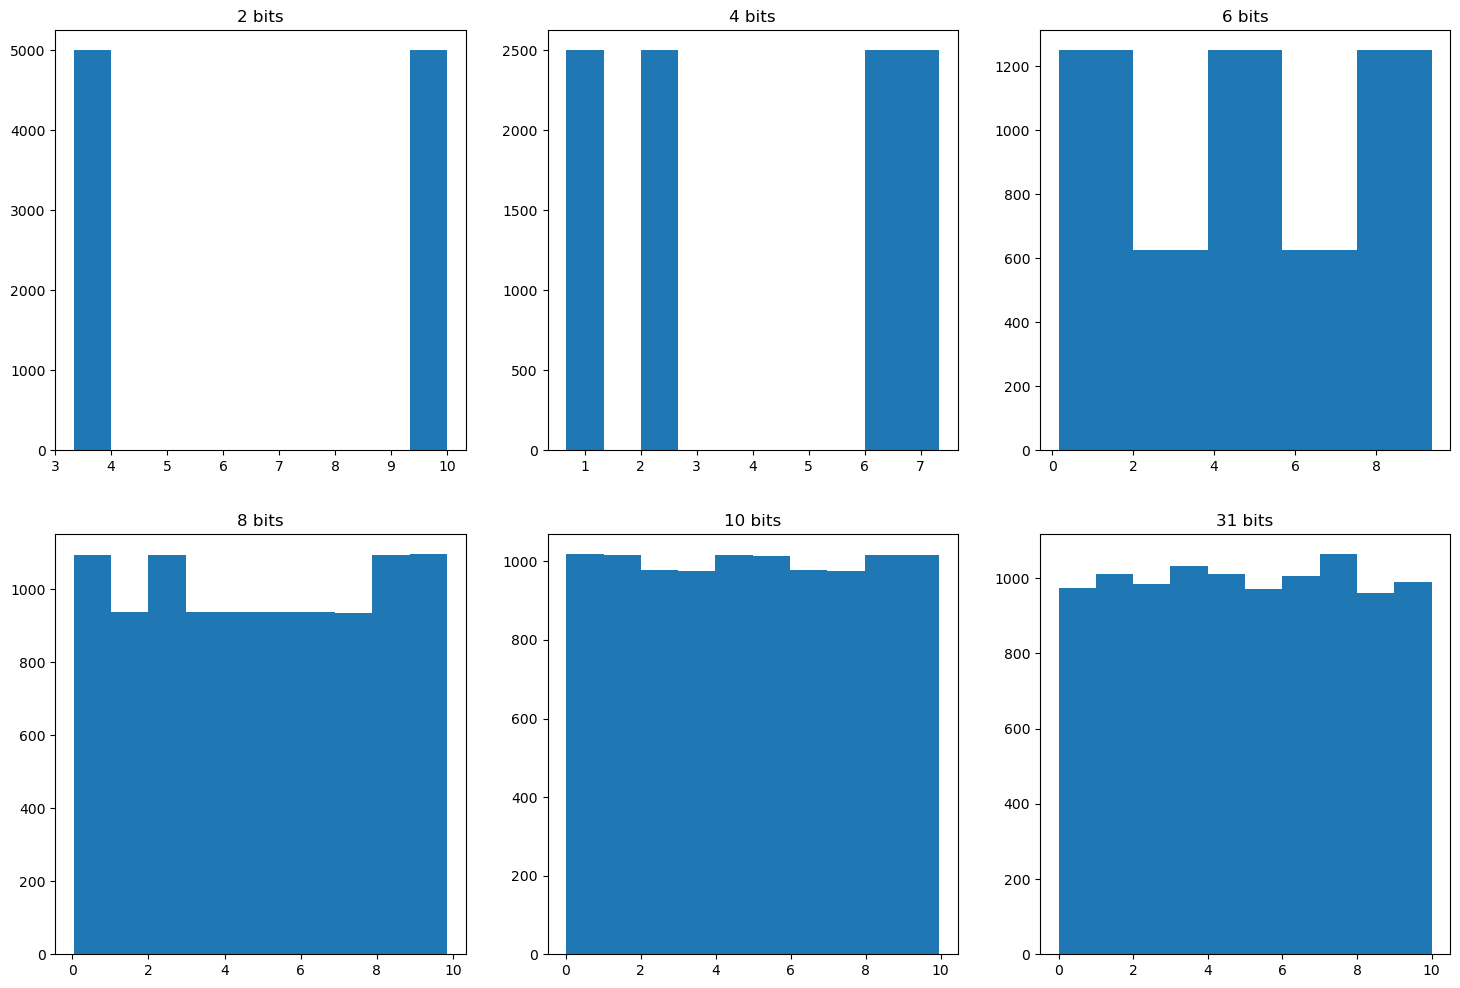

In [147]:
def lcg(x, a, c, m):
    while True:
        x = (a * x + c) % m
        yield x


def random_uniform_sample(n, interval, seed=0, bit_width=31):
    a, c, m = 2**16 + 3, 0, 2 ** bit_width;
    bsdrand = lcg(seed, a, c, m)

    lower, upper = interval[0], interval[1]
    sample = []

    for i in range(n):
        observation = (upper - lower) * (next(bsdrand) / (2 ** bit_width - 1)) + lower
        sample.append(observation)

    return sample

# The different digures show the result for different bit resolution, which is a major quality 
# criterion for the LCG
N = 10000;
seed = 1;
fig, ax = plt.subplots(2, 3, figsize=(18, 12))
ax[0, 0].hist(random_uniform_sample(N, [0.0, 10.0], seed, 2))
ax[0, 0].set_title("2 bits")
ax[0, 1].hist(random_uniform_sample(N, [0.0, 10.0], seed, 4))
ax[0, 1].set_title("4 bits")
ax[0, 2].hist(random_uniform_sample(N, [0.0, 10.0], seed, 6))
ax[0, 2].set_title("6 bits")
ax[1, 0].hist(random_uniform_sample(N, [0.0, 10.0], seed, 8))
ax[1, 0].set_title("8 bits")
ax[1, 1].hist(random_uniform_sample(N, [0.0, 10.0], seed, 10))
ax[1, 1].set_title("10 bits")
ax[1, 2].hist(random_uniform_sample(N, [0.0, 10.0], seed, 31))
ax[1, 2].set_title("31 bits")
# plt.savefig("Chapter2_LCG-Histogram.png")
plt.show()

### Correlation of LCG

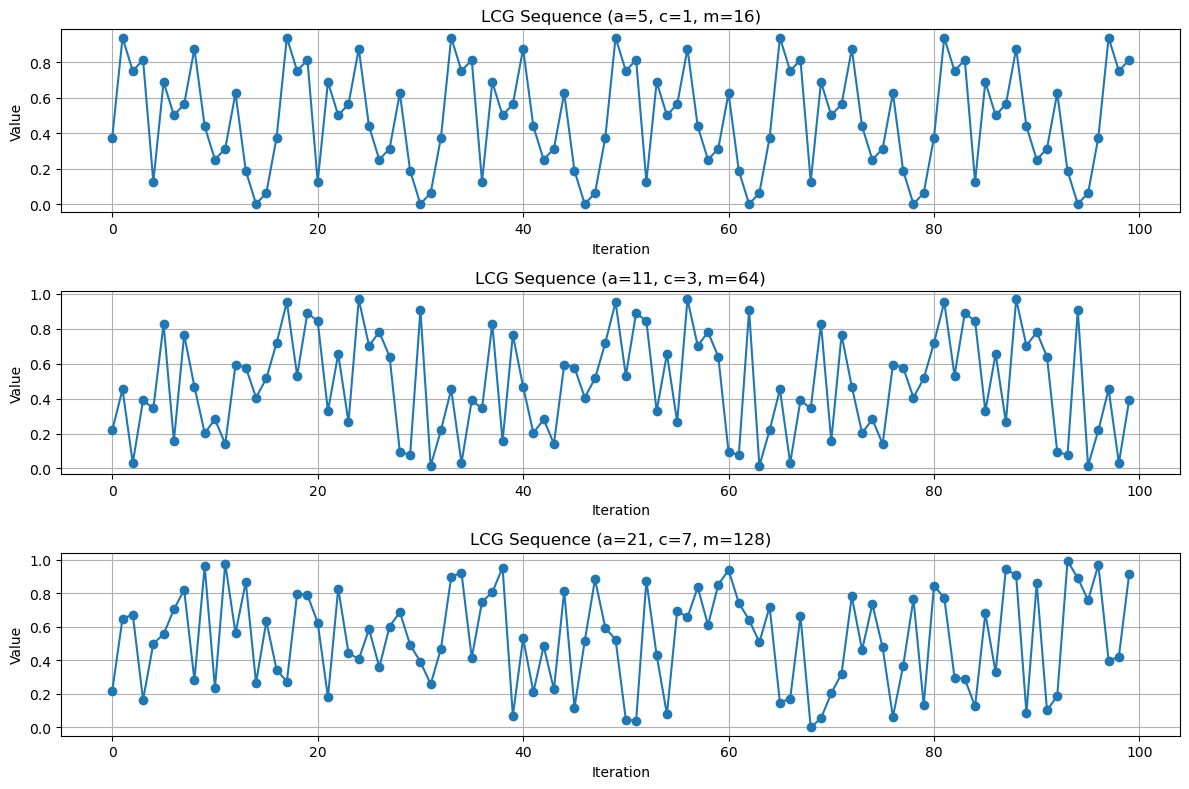

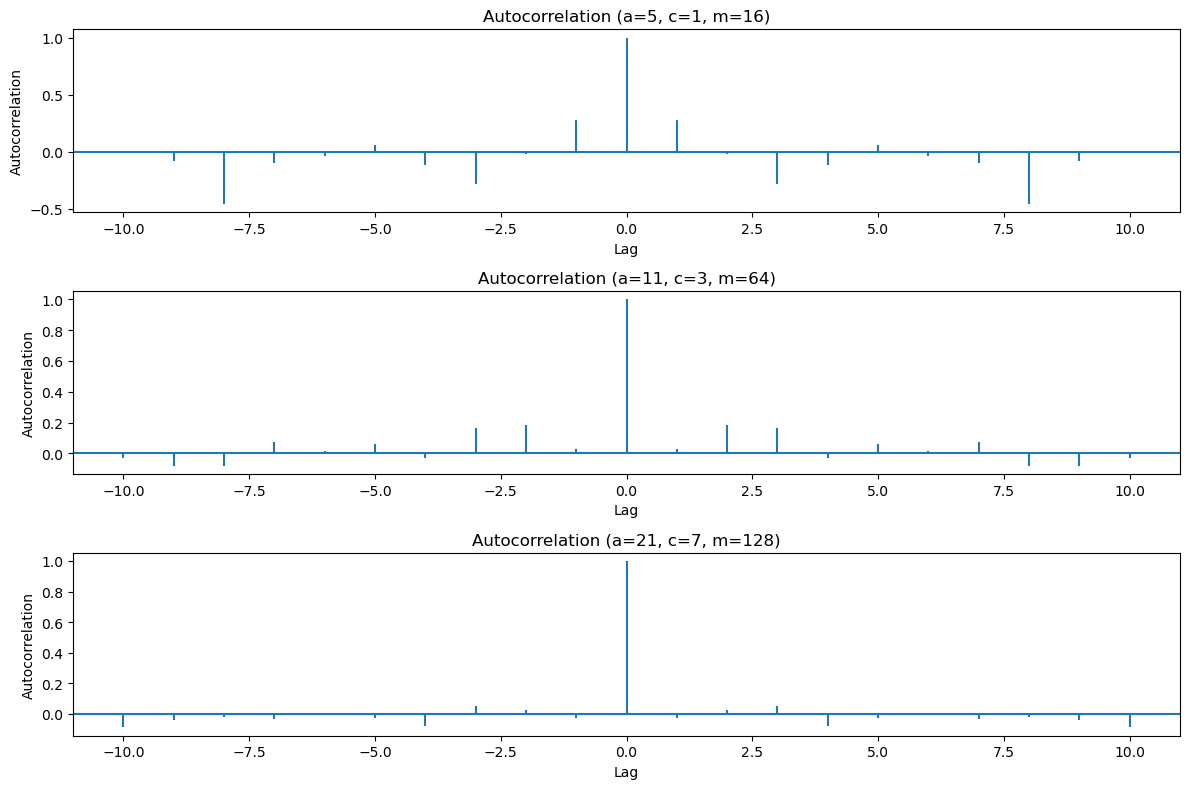

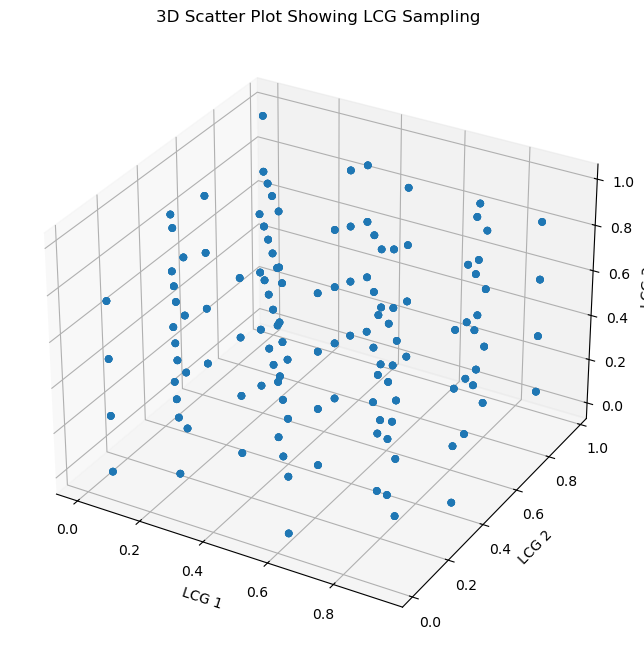

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the LCG function
def lcg(a, c, m, seed, n):
    x = seed
    results = []
    for _ in range(n):
        x = (a * x + c) % m
        results.append(x / m)
    return np.array(results)

# Parameters for different LCG configurations
params = [
    {'a': 5, 'c': 1, 'm': 16, 'seed': 1},
    {'a': 11, 'c': 3, 'm': 64, 'seed': 1},
    {'a': 21, 'c': 7, 'm': 128, 'seed': 1}
]

# Number of random numbers to generate
n = 100

# Generate LCG sequences
sequences = [lcg(**param, n=n) for param in params]

# Plot random number sequences
plt.figure(figsize=(12, 8))
for i, seq in enumerate(sequences):
    plt.subplot(3, 1, i + 1)
    plt.plot(seq, 'o-')
    plt.title(f"LCG Sequence (a={params[i]['a']}, c={params[i]['c']}, m={params[i]['m']})")
    plt.xlabel("Iteration")
    plt.ylabel("Value")
    plt.grid(True)

plt.tight_layout()
plt.show()

# Plot autocorrelation functions
plt.figure(figsize=(12, 8))
for i, seq in enumerate(sequences):
    plt.subplot(3, 1, i + 1)
    plt.acorr(seq - np.mean(seq), maxlags=10, normed=True)
    plt.title(f"Autocorrelation (a={params[i]['a']}, c={params[i]['c']}, m={params[i]['m']})")
    plt.xlabel("Lag")
    plt.ylabel("Autocorrelation")

plt.tight_layout()
plt.show()

# Generate 3D samples using three LCG sequences
n_samples = 1000
a1, c1, m1, seed1 = 5, 1, 16, 1
a2, c2, m2, seed2 = 11, 3, 64, 2
a3, c3, m3, seed3 = 21, 7, 128, 3

x_seq = lcg(a1, c1, m1, seed1, n_samples)
y_seq = lcg(a2, c2, m2, seed2, n_samples)
z_seq = lcg(a3, c3, m3, seed3, n_samples)

# 3D Scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_seq, y_seq, z_seq, alpha=0.6, marker='o')
ax.set_title('3D Scatter Plot Showing LCG Sampling')
ax.set_xlabel('LCG 1')
ax.set_ylabel('LCG 2')
ax.set_zlabel('LCG 3')
plt.show()


## Inverse Transform

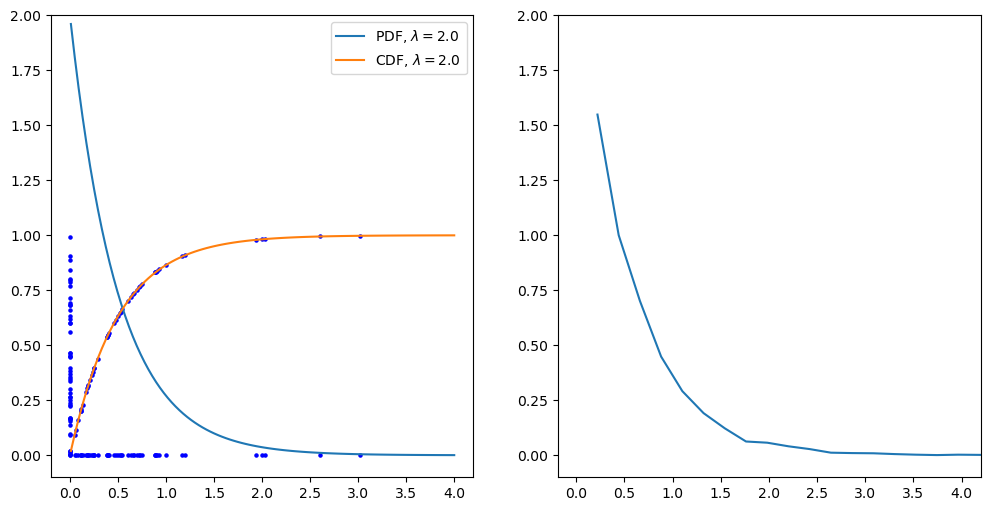

In [155]:
# The r.v. generation is animated and stored as mp4 file
import matplotlib.animation as animation

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
x = np.linspace(0.01, 4.0, 100)
l = 2.0
ax[0].plot(x, stats.expon.pdf(x, scale = 1/l), label = 'PDF, $\lambda=' + str(l) + '$') 
ax[0].plot(x, stats.expon.cdf(x, scale = 1/l), label = 'CDF, $\lambda=' + str(l) + '$')
scat_curve = ax[0].scatter(0, 0, c="b", s=5)
scat_y_axis = ax[0].scatter(0, 0, c="b", s=5)
scat_x_axis = ax[0].scatter(0, 0, c="b", s=5)
ax[0].legend(loc='upper right')
ax[0].set_ylim(-0.1, 2.0)

# Plot showing the generated r.v.
hist_plot, = ax[1].plot(x, stats.expon.cdf(x, scale = 1/l))
ax[1].set_ylim(-0.1, 2.0)

def update(frame):        
    global global_statistics # this will hold the results of all runs
    if frame == 0: # make sure that we reset when starting a new run
        global_statistics = []
    N = 50;
    
    # randomly generate uniformly distributed x
    y = stats.uniform.rvs(size = N);
    x = -np.log(y) * 1/l;    

    scat_y_axis.set_offsets(np.vstack((np.zeros(N,), y)).transpose()) # plot dots on y-axis
    scat_x_axis.set_offsets(np.vstack((x, np.zeros(N,))).transpose()) # plot dots on x-axis
    global_statistics = np.append(global_statistics, x); # store the results in the permanent array    
    counts, bins = np.histogram(global_statistics, bins = 20, density = True); # determine empirical PDF
    hist_plot.set_data(bins[:len(bins)-1]+np.diff(bins), counts); # plot the empirical PDF

    # Plot the drawn samples on the CDF
    y = stats.expon.cdf(x, scale = 1/l);
    z = np.vstack((x, y)).transpose();    
    scat_curve.set_offsets(z);    
    
    return (global_statistics)

ani = animation.FuncAnimation(fig=fig, func=update, frames=100, interval=30)
ani.save(filename="Chapter2_Inverse_Transform.mp4", writer="ffmpeg")
plt.show()

### Impact of LCG quality on transformed PDF

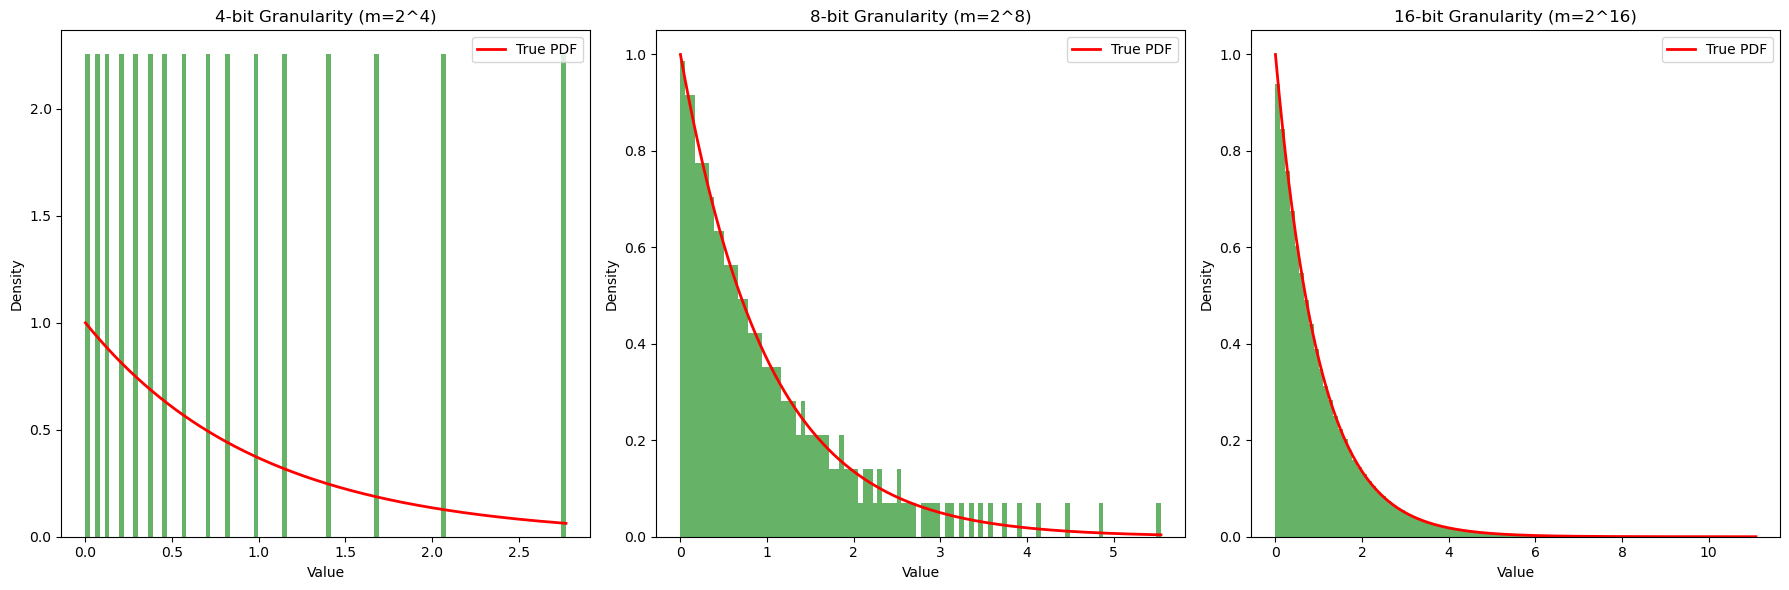

In [154]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Define the LCG function
def lcg(a, c, m, seed, n):
    x = seed
    results = []
    for _ in range(n):
        x = (a * x + c) % m
        results.append(x / m)
    return np.array(results)

# Parameters for different LCG granularities (4-bit, 8-bit, 16-bit)
params = [
    {'a': 5, 'c': 1, 'm': 2**4, 'seed': 1},   # 4-bit granularity
    {'a': 13, 'c': 3, 'm': 2**8, 'seed': 1},  # 8-bit granularity
    {'a': 1103515245, 'c': 12345, 'm': 2**16, 'seed': 1}   # 16-bit granularity
]

# Number of random numbers to generate
n = 100000

# Generate LCG sequences
sequences = [lcg(**param, n=n) for param in params]

# Define the inverse transform sampling function for exponential distribution
def inverse_transform_sampling_exponential(u):
    return expon.ppf(u)

# Generate samples from the target distribution using inverse transform sampling
samples = [inverse_transform_sampling_exponential(seq) for seq in sequences]

# Filter out any infinite values
samples = [sample[np.isfinite(sample)] for sample in samples]

# Plot the resulting PDFs
plt.figure(figsize=(18, 6))

titles = ["4-bit Granularity (m=2^4)", "8-bit Granularity (m=2^8)", "16-bit Granularity (m=2^16)"]
for i, sample in enumerate(samples):
    plt.subplot(1, 3, i + 1)
    plt.hist(sample, bins=100, density=True, alpha=0.6, color='g')
    x = np.linspace(0, np.max(sample), 1000)
    plt.plot(x, expon.pdf(x), 'r-', lw=2, label='True PDF')
    plt.title(titles[i])
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.savefig('Chapter4_Inverse_Transform_LCG_QUality.png')
plt.show()


## Accept-Reject Method

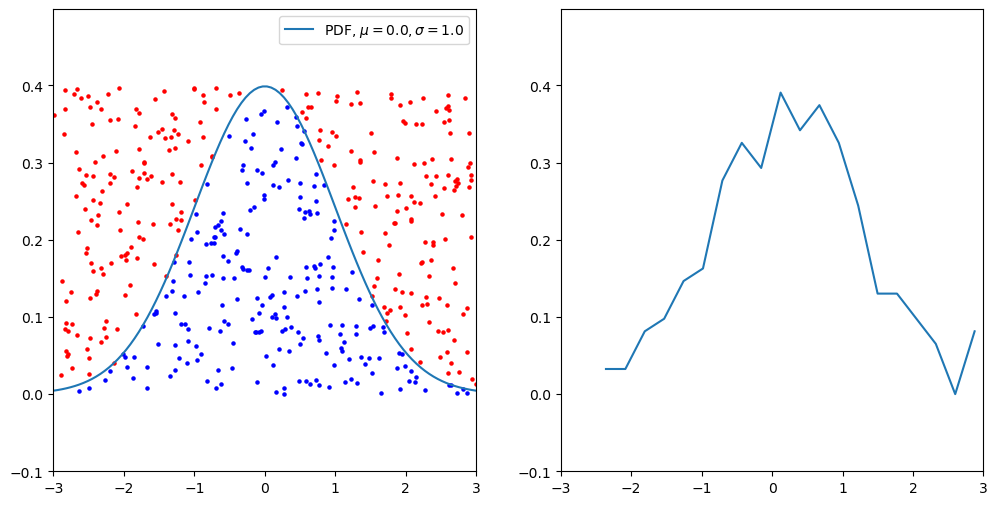

In [156]:
# The r.v. generation is animated and stored as mp4 file
import matplotlib.animation as animation
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
mu = 0.0
sigma = 1.0
x = np.linspace(-3.0*sigma, 3.0*sigma, 100)
c = np.max(stats.norm.pdf(x, mu, sigma))
ax[0].plot(x, stats.norm.pdf(x, mu, sigma), label = 'PDF, $\mu=' + str(mu) + ', \sigma=' + str(sigma) + '$') 
scat_curve_accept = ax[0].scatter(0, 0, c="b", s=5)
scat_curve_reject = ax[0].scatter(0, 0, c="r", s=5)
ax[0].legend(loc='upper right')
ax[0].set_ylim(-0.1, c+0.1)
ax[0].set_xlim(-3.0*sigma, 3.0*sigma);

# Plot showing the generated r.v.
hist_plot, = ax[1].plot(x, stats.norm.pdf(x, mu, sigma))
ax[1].set_ylim(-0.1, c+0.1);
ax[1].set_xlim(-3.0*sigma, 3.0*sigma);

def update(frame):        
    global global_statistics # this will hold the results of all runs
    if frame == 0: # make sure that we reset when starting a new run
        global_statistics = []
    N = 500;
    
    # randomly generate uniformly distributed x
    u1 = stats.uniform.rvs(size = N);
    u2 = stats.uniform.rvs(size = N);

    x = -3.0*sigma + u1*(6.0 * sigma);
    y = c * u2;    
    idx = np.where((stats.norm.pdf(x, mu, sigma) - y) < 0);        
    scat_curve_reject.set_offsets(np.vstack((x[idx], y[idx])).transpose());
    idx = np.where((stats.norm.pdf(x, mu, sigma) - y) > 0);        
    scat_curve_accept.set_offsets(np.vstack((x[idx], y[idx])).transpose());
        
    global_statistics = np.append(global_statistics, x[idx]); # store the results in the permanent array    
    counts, bins = np.histogram(global_statistics, bins = 20, density = True); # determine empirical PDF
    hist_plot.set_data(bins[:len(bins)-1]+np.diff(bins), counts); # plot the empirical PDF
    
    return (global_statistics)

ani = animation.FuncAnimation(fig=fig, func=update, frames=1, interval=30)
ani.save(filename="Chapter2_Accept_Reject.mp4", writer="ffmpeg")
plt.show()

## PDF generation through inverse and PDF transformation

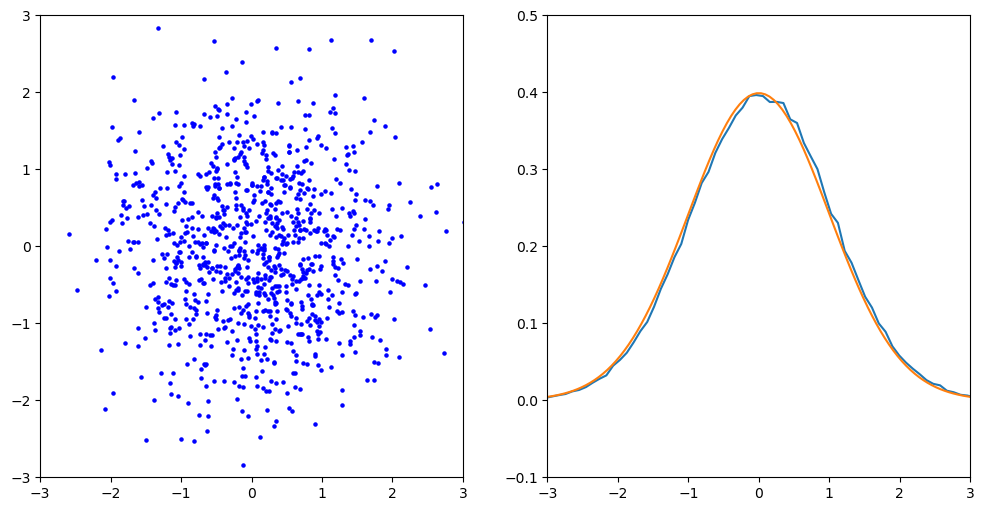

In [8]:
# The r.v. generation is animated and stored as mp4 file
import matplotlib.animation as animation
import scipy.stats as stats

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
mu = 0.0
sigma = 1.0
scat_curve = ax[0].scatter(0, 0, c="b", s=5)
ax[0].set_ylim(-3.0*sigma, 3.0*sigma);
ax[0].set_xlim(-3.0*sigma, 3.0*sigma);

# Plot showing the generated r.v.
hist_plot, = ax[1].plot(np.linspace(-3.0*sigma, 3.0*sigma, 100), stats.norm.pdf(np.linspace(-3.0*sigma, 3.0*sigma, 100), mu, sigma))
ax[1].plot(np.linspace(-3.0*sigma, 3.0*sigma, 100), stats.norm.pdf(np.linspace(-3.0*sigma, 3.0*sigma, 100), mu, sigma))
ax[1].set_ylim(-0.1, 0.5);
ax[1].set_xlim(-3.0*sigma, 3.0*sigma);

def update(frame):        
    global global_statistics # this will hold the results of all runs
    if frame == 0: # make sure that we reset when starting a new run
        global_statistics = []
    N = 1000;
    
    # randomly generate uniformly distributed x
    U1 = stats.uniform.rvs(size = N);
    U2 = stats.uniform.rvs(size = N);
    angle = 2.0 * np.pi * U1;
    value = -2.0 * np.log(U2);
    x = np.sqrt(value) * np.sin(angle);
    y = np.sqrt(value) * np.cos(angle);    
    scat_curve.set_offsets(np.vstack((x, y)).transpose());
        
    global_statistics = np.append(np.append(global_statistics, x), y); # store the results in the permanent array    
    counts, bins = np.histogram(global_statistics, bins = 100, density = True); # determine empirical PDF
    hist_plot.set_data(bins[:len(bins)-1]+np.diff(bins), counts); # plot the empirical PDF
    
    return (global_statistics)

ani = animation.FuncAnimation(fig=fig, func=update, frames=100, interval=30)
ani.save(filename="Chapter2_Generation_Through_Transformation.mp4", writer="ffmpeg")
plt.show()

# Basics of statistics
## Student t-distribution

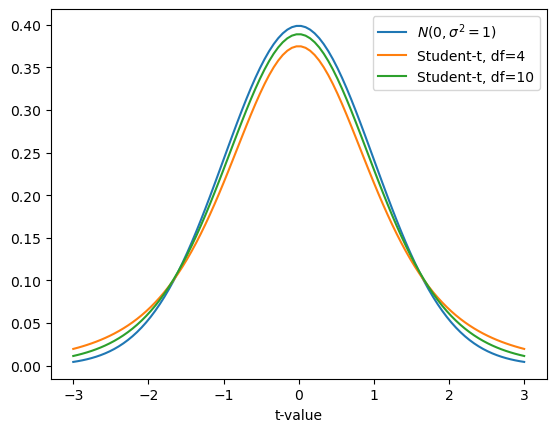

In [18]:
def plot_gaussian(mu, variance):
    sigma = math.sqrt(variance)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), label='$N(0, \sigma^2='+str(variance)+')$')

def plot_student_t(df):    
    x = np.linspace(-3, 3, 100)
    plt.plot(x, stats.t.pdf(x, df), label='Student-t, df='+str(df))

plot_gaussian(0, 1)
plot_student_t(4)
plot_student_t(10)

plt.legend(loc='upper right')
plt.gca().set_xlabel("t-value")
# plt.savefig("Chapter2_Student_t.png")
plt.show()

## Chi-Square

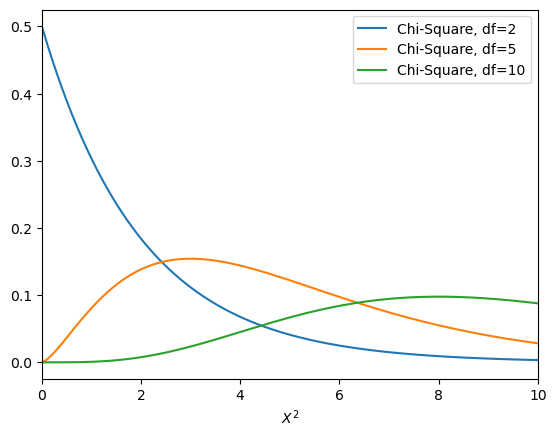

In [19]:
def plot_chi_square(df):    
    x = np.linspace(0, 10, 100)
    plt.plot(x, stats.chi2.pdf(x, df), label='Chi-Square, df='+str(df))

plot_chi_square(2)
plot_chi_square(5)
plot_chi_square(10)

plt.legend(loc='upper right')
plt.gca().set_xlabel("$X^2$")
plt.gca().set_xlim(0, 10)
# plt.savefig("Chapter2_Chi_Square.png")
plt.show()

## Example for normal distribution of mean value

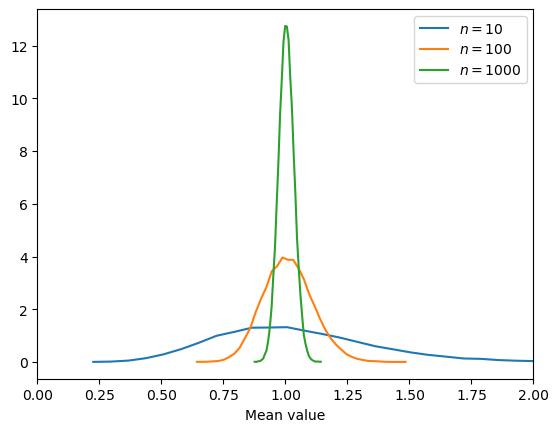

In [20]:
def determine_pdf(n):
    N = 50000;
    x = stats.expon.rvs(size = n*N); # random samples
    x = x.reshape((n, N)); # reshape to build columnwise mean values    
    counts, bins = np.histogram(x.mean(axis = 0), bins = 40, density = True)
    plt.plot(bins[:len(bins)-1]+np.diff(bins), counts, label='$n =' + str(n) + '$')    

determine_pdf(10)
determine_pdf(100)
determine_pdf(1000)

plt.legend(loc='upper right')
plt.gca().set_xlim(0, 2)
plt.gca().set_xlabel("Mean value")
# plt.savefig("Chapter2_Distribution-of-mean-values.png")
plt.show()    

## Student-t test

Text(0, 0.5, 'T-value')

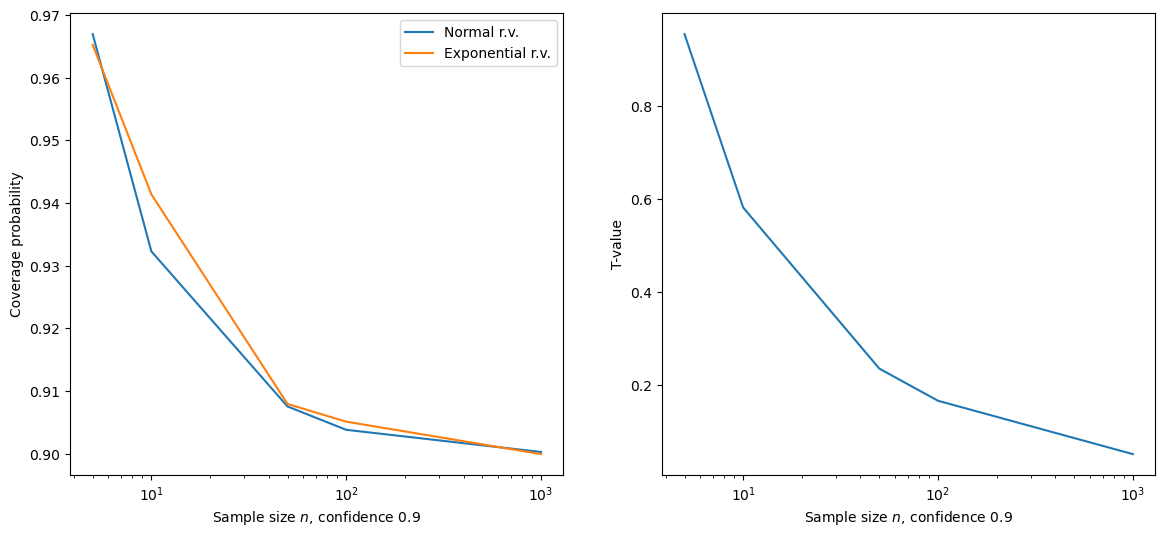

In [22]:
# Example for testing using the student-t distribution
m = 50000;
y = np.empty((5, 4), dtype = float);
index = 0;
alpha = 0.1;
for n in [5, 10, 50, 100, 1000]:
    normal_rv = stats.norm.rvs(0, 1, size = (n, m));
    mean_rv = normal_rv.mean(axis = 0);        
    tcomp = np.sqrt(np.var(mean_rv)) * stats.t.ppf(1-alpha/2.0, df = n - 1);
    y[index, 0] = np.sum(np.abs(mean_rv - 0) < tcomp) / m;
    y[index, 1] = tcomp;

    expon_rv = stats.expon.rvs(scale = 1, size = (n, m));
    mean_rv = expon_rv.mean(axis = 0);        
    tcomp = np.sqrt(np.var(mean_rv)) * stats.t.ppf(1-alpha/2.0, df = n - 1);
    y[index, 2] = np.sum(np.abs(mean_rv - 1.0) < tcomp) / m;
    y[index, 3] = tcomp;
    
    index = index + 1;

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].plot([5, 10, 50, 100, 1000], y[:, 0], label = 'Normal r.v.')
ax[0].plot([5, 10, 50, 100, 1000], y[:, 2], label = 'Exponential r.v.')
ax[0].set_xscale('log')
ax[0].legend(loc='upper right')
ax[0].set_xlabel('Sample size $n$, confidence $'+str(1-alpha)+'$')
ax[0].set_ylabel('Coverage probability')

ax[1].plot([5, 10, 50, 100, 1000], y[:, 1])
ax[1].set_xscale('log')
ax[1].set_xlabel('Sample size $n$, confidence $'+str(1-alpha)+'$')
ax[1].set_ylabel('T-value')

# plt.savefig("Chapter2_Student_t_test.png")

Critical value for a = 5%: 19.67513757268249
Chi-Squared Test Statistic: 8.659575403620615
Chi-Squared Test p-value (if >a, fail to reject hypothesis): 0.6532822713467636
Critical value for a = 5%: 0.2808686150240285
Kolmogorov-Smirnov Test Statistic: 0.02346246127401308
Kolmogorov-Smirnov Test p-value: 1.0


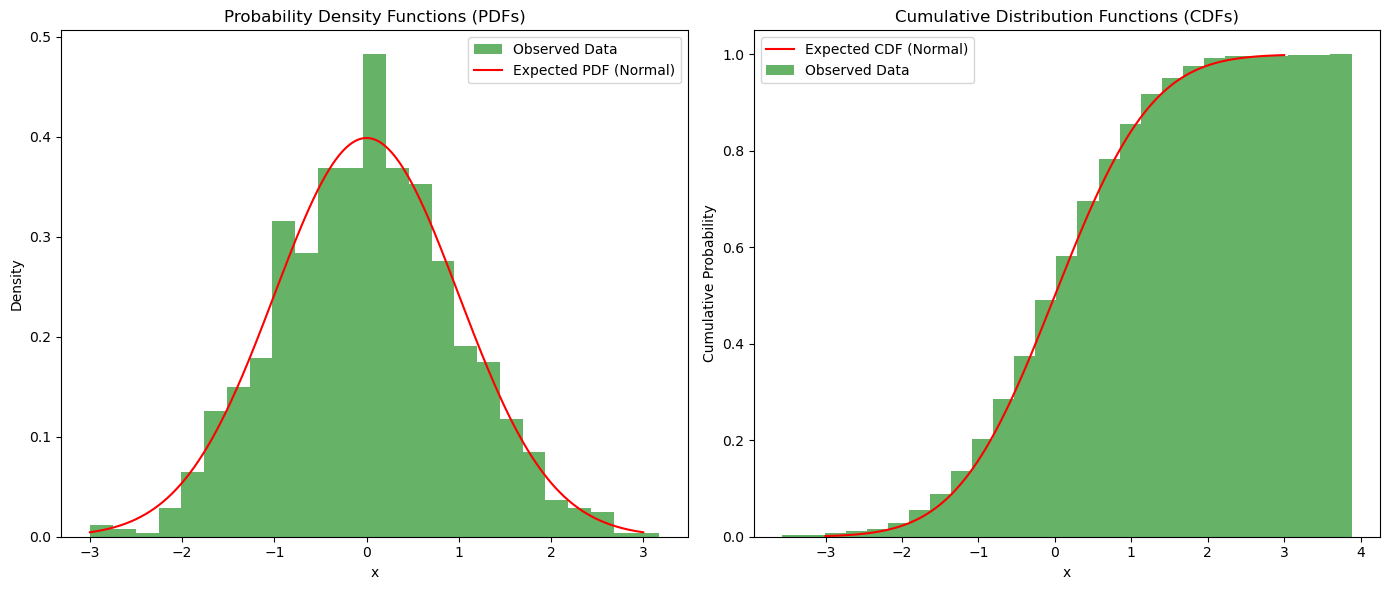

In [120]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generating data for the tests
#observed_data = np.random.uniform(low=-3, high=3, size=1000)  # Uniformly distributed data
observed_data = np.random.normal(loc=0, scale=1, size=1000)  # Normally distributed data

# Chi-Squared Goodness-of-Fit Test
def chi_squared_test(observed_data):
    # Bin the data
    observed_freq, observed_bins = np.histogram(observed_data, bins=np.arange(-3, 3.5, 0.5))        
    expected_freq = (stats.norm.cdf(observed_bins[1:], loc=0, scale=1) - stats.norm.cdf(observed_bins[:-1], loc=0, scale=1)) * len(observed_data)        

    observed_freq = np.sum(expected_freq)/np.sum(observed_freq) * observed_freq
    
    # Chi-squared test    
    chi2 = np.sum((observed_freq - expected_freq) ** 2 / expected_freq)
    print(f"Critical value for a = 5%: {stats.chi2.ppf(1- 0.05, df=len(observed_freq) - 1)}")
    p_value = 1 - stats.chi2.cdf(chi2, df=len(observed_freq) - 1)
    
    return chi2, p_value

chi2, p_value_chi2 = chi_squared_test(observed_data)
print(f"Chi-Squared Test Statistic: {chi2}")
print(f"Chi-Squared Test p-value (if >a, fail to reject hypothesis): {p_value_chi2}")

# Kolmogorov-Smirnov Test
def kolmogorov_smirnov_test(observed_data):
    # KS test
    observed_freq, observed_bins = np.histogram(observed_data, bins=np.arange(-3, 3.5, 0.5))        
    observed_freq = np.cumsum(observed_freq)
    expected_freq = stats.norm.cdf(observed_bins[1:], loc=0, scale=1) 
    N = len(observed_data)
    d_stat = np.max(np.abs(1/N * observed_freq - expected_freq))
    en = np.floor(np.sqrt(N*N / (2*N)))    
    p_value = 1 - stats.kstwo.cdf(d_stat, en)

    print(f"Critical value for a = 5%: {stats.kstwo.ppf(1 - 0.05, en)}")
    
    return d_stat, p_value

ks_stat, p_value_ks = kolmogorov_smirnov_test(observed_data)
print(f"Kolmogorov-Smirnov Test Statistic: {ks_stat}")
print(f"Kolmogorov-Smirnov Test p-value: {p_value_ks}")

# Plotting the distributions and the CDFs
x = np.linspace(-3, 3, 1000)
pdf_expected = stats.norm.pdf(x, loc=0, scale=1)

cdf_expected = stats.norm.cdf(x, loc=0, scale=1)

plt.figure(figsize=(14, 6))

# Plotting PDFs
plt.subplot(1, 2, 1)
plt.hist(expected_data, bins='auto', density=True, alpha=0.6, color='g', label='Observed Data')
plt.plot(x, pdf_expected, 'r-', label='Expected PDF (Normal)')
plt.title('Probability Density Functions (PDFs)')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()

# Plotting CDFs
plt.subplot(1, 2, 2)
plt.plot(x, cdf_expected, 'r-', label='Expected CDF (Normal)')
plt.hist(observed_data, bins='auto', density=True, cumulative=True, alpha=0.6, color='g', label='Observed Data')
plt.title('Cumulative Distribution Functions (CDFs)')
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.legend()

plt.tight_layout()
plt.savefig("Chapter4_Goodness_of_fit.png")
plt.show()


## Illustration of Q-Q-Plots

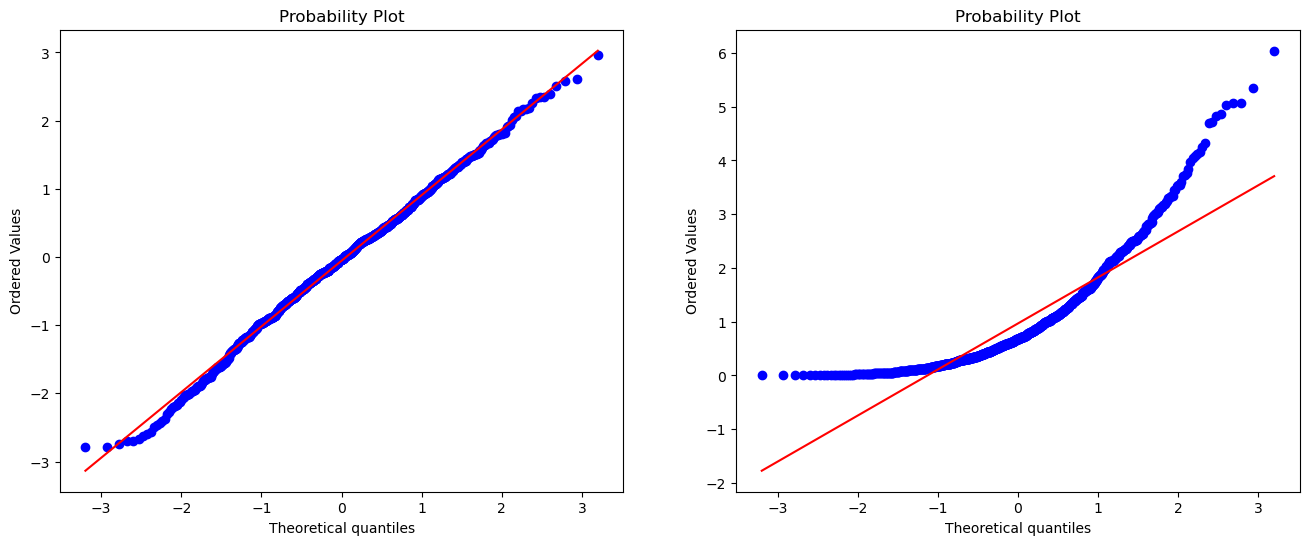

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
measurements = stats.norm.rvs(loc = 0, scale = 1, size=1000)   
stats.probplot(measurements, dist="norm", plot=ax[0])

measurements = stats.expon.rvs(loc = 0, scale = 1, size=1000)   
stats.probplot(measurements, dist="norm", plot=ax[1])

# plt.savefig("Chapter2_Q-Q-Plot.png")
plt.show()

## Fitting of polynomial to random sample

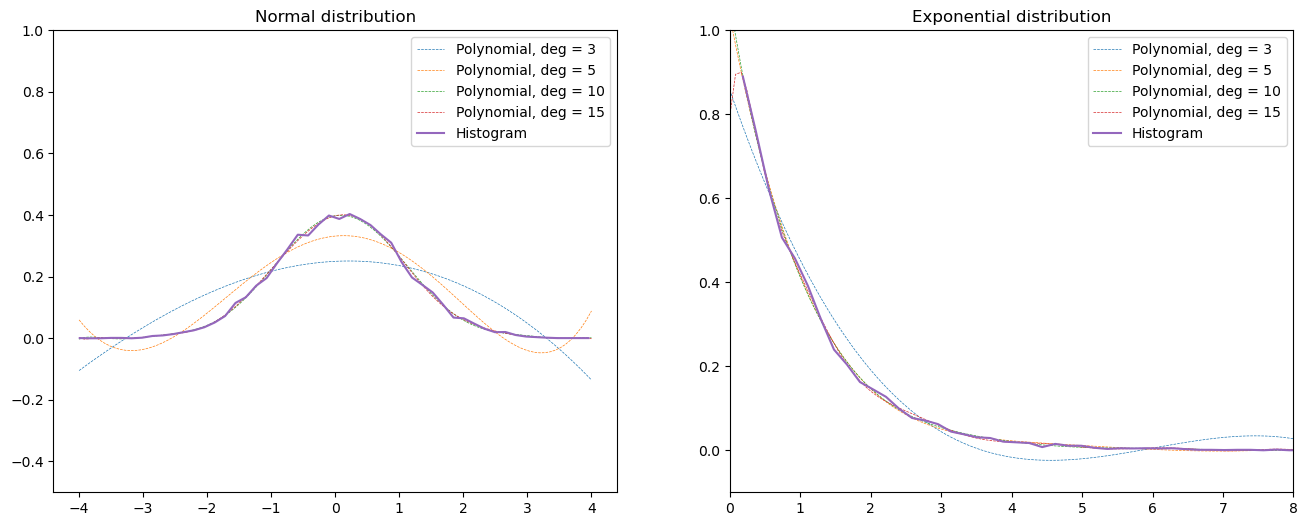

In [25]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))

measurements = stats.norm.rvs(loc = 0, scale = 1, size=10000) 
counts, bins = np.histogram(measurements, bins = 50, density = True); # determine empirical PDF

for degree in [3, 5, 10, 15]:
    poly_series = np.polynomial.Polynomial.fit(bins[:len(bins)-1]+np.diff(bins), counts, deg=degree)
    x_poly, y_poly = poly_series.linspace(domain = [-4, 4])
    ax[0].plot(x_poly, y_poly, linestyle = '--', linewidth = '0.5', label='Polynomial, deg = ' + str(degree))

ax[0].plot(bins[:len(bins)-1]+np.diff(bins), counts, label='Histogram')
ax[0].set_ylim(-0.5, 1.0)
ax[0].set_title('Normal distribution')
ax[0].legend(loc='upper right')

measurements = stats.expon.rvs(loc = 0, scale = 1, size=10000) 
counts, bins = np.histogram(measurements, bins = 50, density = True); # determine empirical PDF

for degree in [3, 5, 10, 15]:
    poly_series = np.polynomial.Polynomial.fit(bins[:len(bins)-1]+np.diff(bins), counts, deg=degree)
    x_poly, y_poly = poly_series.linspace(domain = [0, 8])
    ax[1].plot(x_poly, y_poly, linestyle = '--', linewidth = '0.5', label='Polynomial, deg = ' + str(degree))

ax[1].plot(bins[:len(bins)-1]+np.diff(bins), counts, label='Histogram')
ax[1].set_ylim(-0.1, 1.0)
ax[1].set_xlim(0.0, 8.0)
ax[1].set_title('Exponential distribution')
ax[1].legend(loc='upper right');

# plt.savefig('Chapter2_Interpolation.png')



## Kernel density estimation

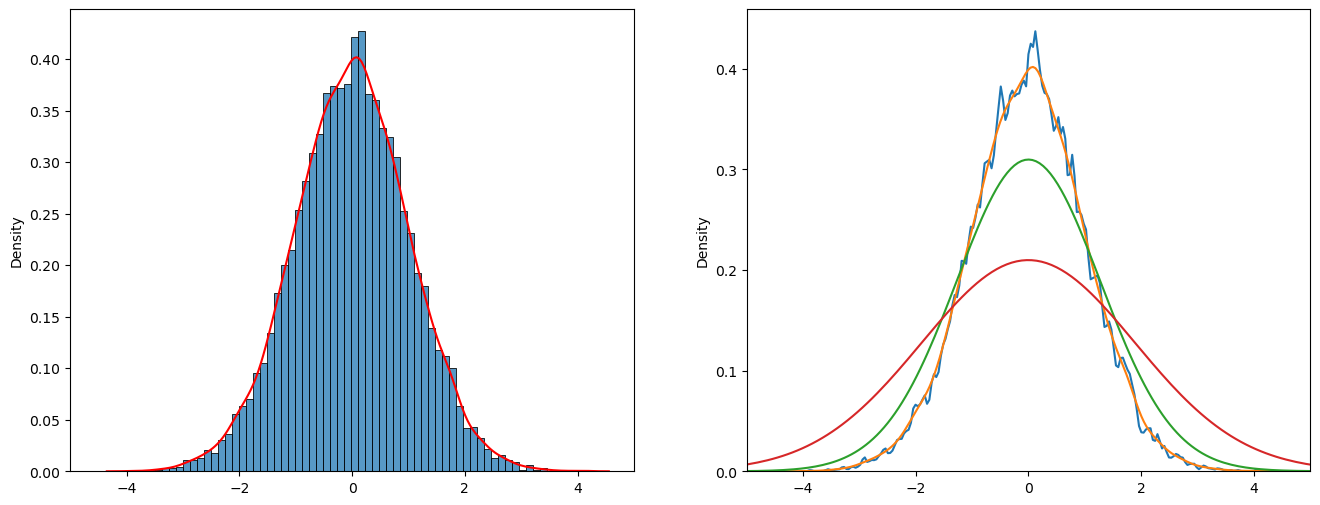

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
measurements = stats.norm.rvs(loc = 0, scale = 1, size=10000) 
sns.histplot(measurements, stat = 'density', ax = ax[0]);
sns.kdeplot(measurements, color = 'red', ax = ax[0]);
ax[0].set_xlim(-5, 5)

sns.kdeplot(measurements, bw_adjust = 0.2, ax = ax[1]);
sns.kdeplot(measurements, bw_adjust = 1.0, ax = ax[1]);
sns.kdeplot(measurements, bw_adjust = 5.0, ax = ax[1]);
sns.kdeplot(measurements, bw_adjust = 10.0, ax = ax[1]);
ax[1].set_xlim(-5, 5);
# plt.savefig('Chapter2_KDE.png')